# Different imports and setup

In [1]:
# Different libraries import
import pandas as pd

### Functions

In [2]:
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/main/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Extend dataset

In [3]:
extend = False

In [4]:
# To add the weekday to every quote of the dataset.
# We create a new dataset to not alter the original in case of problems

if extend:
  years = [2015, 2016, 2017, 2018, 2019, 2020]

  for year in tqdm(years):
    path_to_file = f'quotes-{year}.json.bz2' 
    save_df_with_day(path_to_file)

In [5]:
# To add the sentiment to every quote of the dataset.

if extend:
  for year in tqdm(years):
    path_to_file = f'day_quotes-{year}.json.bz2' 
    save_df_with_sentiment(path_to_file)

### Importing test df

In [6]:
filename = 'quotes-2016_days_sentiment.json.bz2' 
df = create_frame(filename, 20000)

## Weekday stats

In [7]:
weekdays_stats(df)

Monday :
Proportion of positives:  0.7105143377332727
Proportion of negatives:  0.28948566226672734
0.2001269639794168
0.2655303140646336
Tuesday :
Proportion of positives:  0.6898912605718889
Proportion of negatives:  0.3101087394281112
0.1817897816858702
0.24145900120821587
Wednesday :
Proportion of positives:  0.7036744369814303
Proportion of negatives:  0.2963255630185697
0.19171423498076354
0.25594721453970765
Thursday :
Proportion of positives:  0.7062125748502994
Proportion of negatives:  0.2937874251497006
0.19966805239179958
0.26243794910179646
Friday :
Proportion of positives:  0.7104754541940471
Proportion of negatives:  0.2895245458059528
0.20104578065274917
0.2643048705063781
Saturday :
Proportion of positives:  0.7026431718061674
Proportion of negatives:  0.2973568281938326
0.20079774901519412
0.2619806167400881
Sunday :
Proportion of positives:  0.7109256449165402
Proportion of negatives:  0.2890743550834598
0.1968918509895227
0.2566465857359636


## Plot distributions

### Weekdays

Monday :


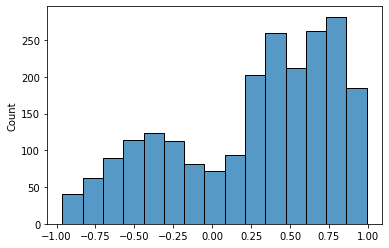

Tuesday :


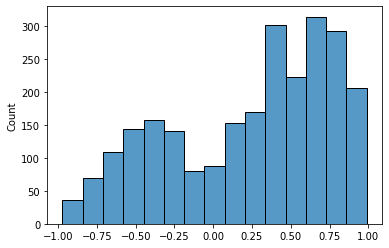

Wednesday :


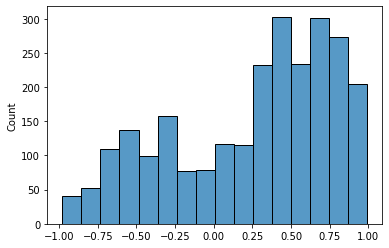

Thursday :


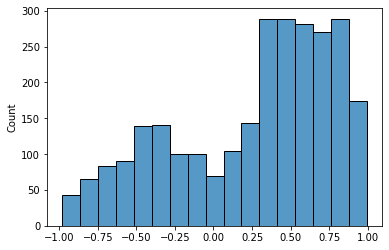

Friday :


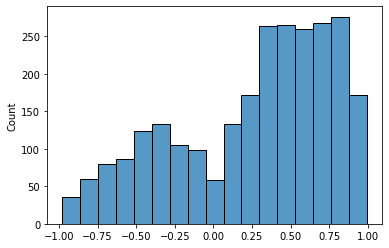

Saturday :


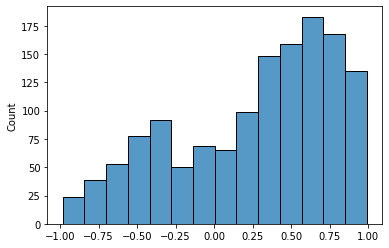

Sunday :


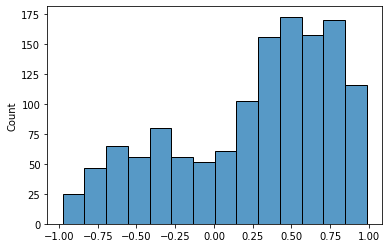

In [8]:
weekdays_sent_plot(df)